<a href="https://colab.research.google.com/github/ruforavishnu/Project_Machine_Learning/blob/master/Project16_Unsupervised_Learning_Genetic_Clustering_of_DNA_Sequences.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd



In [2]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans


In [4]:
import matplotlib.pyplot as plt
import random
from tqdm import tqdm


In [5]:
def generate_base_sequence(length=300):
  return ''.join(random.choices(['A','C','G','T']  , k=length))

In [6]:
def mutate_sequence(sequence, num_mutations=10):
  sequence = list(sequence)

  for _ in range(num_mutations):
    idx = random.randint(0, len(sequence)-1  )
    sequence[idx] = random.choice(['A', 'C', 'G', 'T'])

  return ''.join(sequence)



In [9]:
def generate_family(num_sequences=100,  length=300,  mutations=10):
  base = generate_base_sequence(length)
  family = [mutate_sequence(base, mutations)  for _ in range(num_sequences) ]
  return family


In [35]:
family1 = generate_family(num_sequences=100,  length=300, mutations=10 )

family2 = generate_family(num_sequences=100,  length=300, mutations=15 )

family3 = generate_family(num_sequences=100,  length=300, mutations=20 )



dna_sequences = family1 + family2 + family3

my_reqd_sequence = dna_sequences[0]
my_reqd_sequence


'AGATCCTGGACTTCAAGGTCATTCGAAAGAGCATTTTGATAGCCTTATGCATAGGCAGTTAAGGGGGGGCGTTTTTGCATAGAGTCGCAGTAGCGTTGTTCTTGCGTCTCGTTATCTGCATGCACTAAACTCCATTTCCGTCACGGCCTTGGATAGCCCCACTTGCACCCCACCTTCCTCGGCAACTATACTTGGCGGGCGCGCGGCTGGGTTGCGGACCCAACTTTCCAAAACCACGCGAGTGAACGCGCCAGATGGCGGGTTTTATGTGAGAAGGCTTCTGCCAATAACTCCCGTCTA'

In [12]:
from itertools import product


def generate_kmers(k=4):
  return [''.join(p) for p in product('ACGT', repeat=k)]



In [13]:
kmers = generate_kmers(k=4)



In [14]:
def encode_sequence_kmer(sequence, kmers):
  vector = []

  for kmer in kmers:
    count = sequence.count(kmer)
    vector.append(count)

  return vector



In [15]:
encoded_sequences = []

for seq in tqdm(dna_sequences):
  encoded_sequences.append(encode_sequence_kmer(seq, kmers))




100%|██████████| 300/300 [00:00<00:00, 2562.97it/s]


In [16]:
df = pd.DataFrame(encoded_sequences)
df

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,1,1,1,2,0,0,1,1,0,1,...,2,1,1,0,0,2,1,0,0,0
1,1,1,2,2,0,0,1,0,0,1,...,0,1,1,0,0,2,1,0,0,0
2,0,1,2,1,0,0,1,1,0,1,...,0,1,1,0,0,1,1,0,0,0
3,1,1,1,2,1,0,2,1,0,1,...,0,1,1,0,1,1,1,0,0,0
4,1,1,0,2,0,0,1,1,0,1,...,0,1,2,0,1,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0,1,0,0,1,1,0,0,1,1,...,1,0,0,1,0,0,0,0,0,0
296,1,2,0,0,2,0,1,2,0,1,...,2,0,0,0,0,1,0,1,0,0
297,0,1,0,0,1,0,0,2,0,1,...,2,0,0,0,0,1,0,0,0,0
298,0,1,0,0,1,0,0,0,1,1,...,2,1,0,0,0,1,0,0,0,0


In [18]:
pca = PCA(n_components=50)


pca_result = pca.fit_transform(df)


tsne = TSNE(n_components=2, perplexity=30, random_state=42)


tsne_result = tsne.fit_transform(pca_result)



In [19]:
kmeans = KMeans(n_clusters=3, random_state=42)


kmeans.fit(tsne_result)


labels = kmeans.labels_





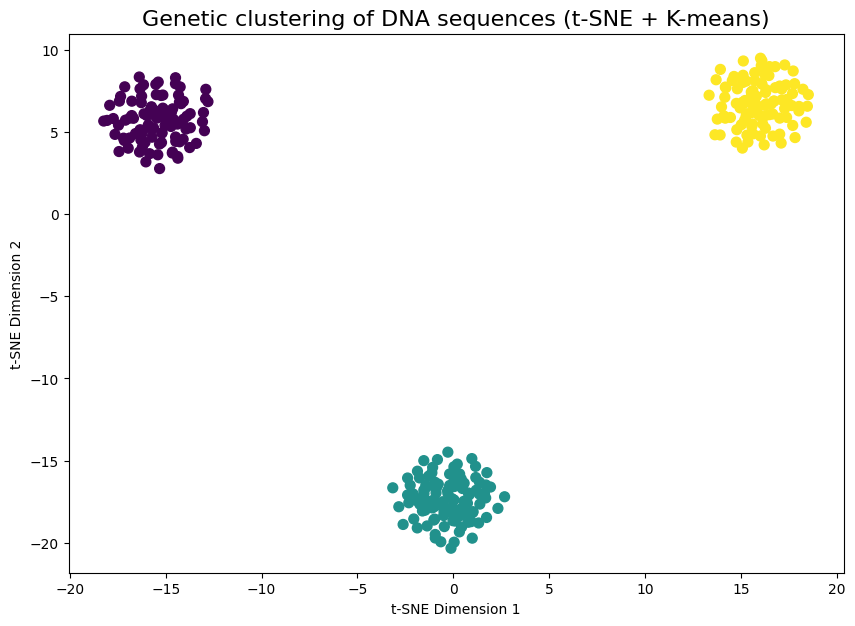

In [20]:
plt.figure(figsize=(10,7))

plt.scatter(tsne_result[: , 0]  , tsne_result[:, 1],  c=labels,  cmap='viridis', s=50)

plt.title('Genetic clustering of DNA sequences (t-SNE + K-means)', fontsize=16)

plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid(False)
plt.show()



In [36]:
import imageio

frames = []

num_frames = 40

start_positions = pca_result[: , :2 ]

end_positions = tsne_result



for i in range(num_frames):
  alpha = i / (num_frames-1)

  interp_points = ( 1 - alpha )*start_positions    +     alpha*end_positions

  plt.figure(figsize=(10,7))
  plt.scatter(interp_points[: , 0]  , interp_points[:, 1],   c=labels,  cmap='viridis',   s=50 )
  plt.title(f'DNA Clustering Transition - Frame {i+1}', fontsize=14)
  plt.xlabel('Dimension 1')
  plt.ylabel('Dimension 2')
  plt.grid(False)

  frame_path = f'frame_{i}.png'
  plt.savefig(frame_path)
  plt.close()

  frames.append(imageio.imread(frame_path))



gif_path = 'dna_clustering.gif'
imageio.mimsave(gif_path,  frames,  duration=0.15, loop=0)




/tmp/ipython-input-983102564.py:29: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(frame_path))


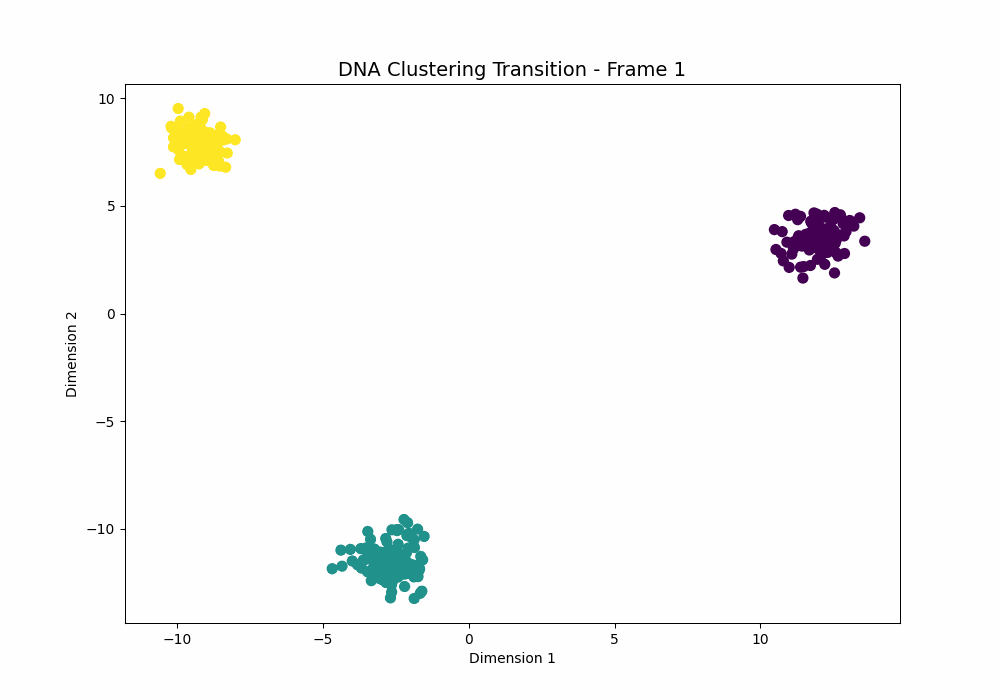

In [37]:
from IPython.display import Image
Image(filename='dna_clustering.gif')